	grad: 1 2 -3.0
	grad: 1.8 4 -9.215999603271484
	grad: 2.5 6.9 -12.980001449584961
	grad: 3.0 7.5 9.35280990600586
progress: 0 2.0843193531036377 2.4298624992370605
	grad: 1 2 0.1686387062072754
	grad: 1.8 4 -1.0028886795043945
	grad: 2.5 6.9 -7.403194904327393
	grad: 3.0 7.5 7.345149993896484
progress: 1 2.173548936843872 1.4986451864242554
	grad: 1 2 0.34709787368774414
	grad: 1.8 4 -0.5403221845626831
	grad: 2.5 6.9 -7.089107036590576
	grad: 3.0 7.5 7.232082366943359
progress: 2 2.1785740852355957 1.4528615474700928
	grad: 1 2 0.3571481704711914
	grad: 1.8 4 -0.5142725706100464
	grad: 2.5 6.9 -7.071418762207031
	grad: 3.0 7.5 7.225713729858398
progress: 3 2.1788570880889893 1.4503039121627808
	grad: 1 2 0.3577141761779785
	grad: 1.8 4 -0.5128048658370972
	grad: 2.5 6.9 -7.070422172546387
	grad: 3.0 7.5 7.225353240966797
progress: 4 2.178873062133789 1.4501591920852661
predict (after training) 4 8.715492248535156


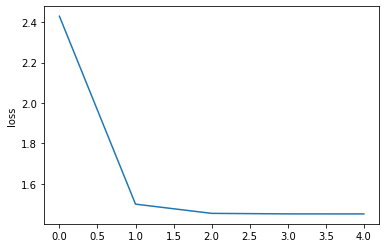

In [3]:
import matplotlib.pyplot as plt
import torch

# y = w*x
x_data = [1, 1.8, 2.5, 3.0]
y_data = [2, 4, 6.9, 7.5]
 
loss_list = []
w = torch.Tensor([0.5])
w.requires_grad = True
 
def forward(x):
    return x * w        #W是tensor，tensor的运算后是建立计算图
 
def loss(x, y):
    y_pre = forward(x)
    return (y-y_pre)**2
 
for epoch in range(5):
    for x, y in zip(x_data, y_data):
        l = loss(x, y)      #建立计算图
        l.backward()        #每次调用backward后，计算图消失
        print('\tgrad:', x, y, w.grad.item())
        w.data = w.data - 0.1 * w.grad.data  #W是tensor,.data属性和W.grad.data也是tensor，但其不建立计算图
 
        w.grad.data.zero_()     #防止w的梯度累加起来,因此需要清空
 
    loss_list.append(l.item()) #item()将tensor转换成标量
    print('progress:', epoch, w.item(), l.item())
print("predict (after training)", 4, forward(4).item())
 
plt.plot(loss_list)
plt.ylabel('loss')
plt.show()